In [1]:
# Import the functions used in this project
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [2]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")

In [3]:
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [4]:
X, y = af.get_df_to_fit(df_train_dd)

In [69]:
X_test = af.get_df_to_fit(df_test_dd, is_test_df=True)

In [72]:
X_test = X_test.drop("index", axis=1)

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [7]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.fit_transform(y_test)

# y_pred = lb.inverse_transform(np.round(predictions))
# y_true = lb.inverse_transform(train_y)

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
# from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils

Using TensorFlow backend.


In [13]:
model1 = Sequential()
model1.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model1.add(Dense(20, activation="sigmoid"))
model1.add(Dense(38, activation="softmax"))
model1.compile(optimizer=Adagrad(lr=1.1), loss='categorical_crossentropy', metrics=["accuracy"])

In [68]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/100
 - 0s - loss: 0.8980 - acc: 0.7038 - val_loss: 0.9564 - val_acc: 0.6900
Epoch 2/100
 - 0s - loss: 0.8982 - acc: 0.7044 - val_loss: 0.9562 - val_acc: 0.6901
Epoch 3/100
 - 0s - loss: 0.8980 - acc: 0.7048 - val_loss: 0.9564 - val_acc: 0.6904
Epoch 4/100
 - 0s - loss: 0.8981 - acc: 0.7039 - val_loss: 0.9565 - val_acc: 0.6904
Epoch 5/100
 - 0s - loss: 0.8982 - acc: 0.7039 - val_loss: 0.9562 - val_acc: 0.6900
Epoch 6/100
 - 0s - loss: 0.8980 - acc: 0.7042 - val_loss: 0.9567 - val_acc: 0.6898
Epoch 7/100
 - 0s - loss: 0.8981 - acc: 0.7039 - val_loss: 0.9564 - val_acc: 0.6902
Epoch 8/100
 - 0s - loss: 0.8980 - acc: 0.7047 - val_loss: 0.9562 - val_acc: 0.6905
Epoch 9/100
 - 0s - loss: 0.8981 - acc: 0.7035 - val_loss: 0.9560 - val_acc: 0.6913
Epoch 10/100
 - 0s - loss: 0.8982 - acc: 0.7043 - val_loss: 0.9559 - val_acc: 0.6907
Epoch 11/100
 - 0s - loss: 0.8979 - acc: 0.7043 - val_loss: 0.9563 - val_acc: 0.6900
Epoch 12/100
 - 0s - los

KeyboardInterrupt: 

In [88]:
y_pred = model1.predict(X)

In [89]:
y_pred = lb.inverse_transform(y_pred)

In [90]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.6991

In [91]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          3       0.80      0.92      0.86      3643
          4       0.00      0.00      0.00       346
          5       0.77      0.81      0.79      4593
          6       0.73      0.70      0.71      1277
          7       0.72      0.68      0.70      5752
          8       0.79      0.85      0.82     12161
          9       0.69      0.84      0.75      9464
         12       0.32      0.03      0.05       269
         14       0.00      0.00      0.00         4
         15       0.63      0.39      0.48       978
         18       0.45      0.40      0.42       549
         19       0.34      0.26      0.30       375
         20       0.66      0.59      0.62       637
         21       0.63      0.66      0.65       641
         22       0.45      0.39      0.41       928
         23       0.52      0.10      0.17       139
         24       0.62      0.60      0.61      2609
         25       0.70      0.80      0.74   

In [76]:
log_loss(y, proba)

0.920317847758818

In [74]:
from sklearn.metrics import log_loss

In [26]:
def getNeuralNetworkInfo(hist):
    print("val_acc : ")
    print(np.max(hist.history["val_acc"]))
    print("val_loss : ")
    print(np.min(hist.history["val_loss"]))
    plt.plot(hist.history['loss'])
    plt.show()
    plt.plot(hist.history['acc'], 'b-', label="training")
    plt.plot(hist.history['val_acc'], 'r:', label="test")
    plt.legend()
    plt.show()

In [15]:
np.max(hist1.history["val_acc"])

0.6779722980677941

In [16]:
np.min(hist1.history["val_loss"])

1.0418415796298846

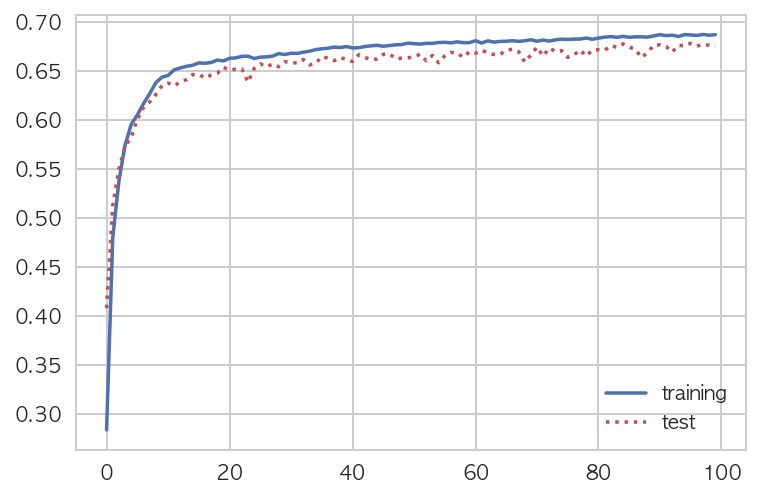

In [17]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [18]:
%%time
hist1_1 = model1.fit(X_train, Y_train, epochs=500, batch_size=1000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 0s - loss: 0.9941 - acc: 0.6869 - val_loss: 1.0501 - val_acc: 0.6746
Epoch 2/500
 - 0s - loss: 0.9947 - acc: 0.6861 - val_loss: 1.0535 - val_acc: 0.6716
Epoch 3/500
 - 0s - loss: 0.9933 - acc: 0.6867 - val_loss: 1.0511 - val_acc: 0.6767
Epoch 4/500
 - 0s - loss: 0.9931 - acc: 0.6867 - val_loss: 1.0433 - val_acc: 0.6772
Epoch 5/500
 - 0s - loss: 0.9926 - acc: 0.6881 - val_loss: 1.0371 - val_acc: 0.6790
Epoch 6/500
 - 0s - loss: 0.9913 - acc: 0.6873 - val_loss: 1.0441 - val_acc: 0.6773
Epoch 7/500
 - 0s - loss: 0.9914 - acc: 0.6879 - val_loss: 1.0417 - val_acc: 0.6782
Epoch 8/500
 - 0s - loss: 0.9906 - acc: 0.6871 - val_loss: 1.0460 - val_acc: 0.6731
Epoch 9/500
 - 0s - loss: 0.9913 - acc: 0.6869 - val_loss: 1.0445 - val_acc: 0.6746
Epoch 10/500
 - 0s - loss: 0.9885 - acc: 0.6878 - val_loss: 1.0404 - val_acc: 0.6749
Epoch 11/500
 - 0s - loss: 0.9881 - acc: 0.6878 - val_loss: 1.0331 - val_acc: 0.6802
Epoch 12/500
 - 0s - los

Epoch 97/500
 - 0s - loss: 0.9605 - acc: 0.6936 - val_loss: 1.0164 - val_acc: 0.6801
Epoch 98/500
 - 0s - loss: 0.9589 - acc: 0.6934 - val_loss: 1.0210 - val_acc: 0.6776
Epoch 99/500
 - 0s - loss: 0.9591 - acc: 0.6945 - val_loss: 1.0133 - val_acc: 0.6820
Epoch 100/500
 - 0s - loss: 0.9586 - acc: 0.6945 - val_loss: 1.0191 - val_acc: 0.6801
Epoch 101/500
 - 0s - loss: 0.9590 - acc: 0.6939 - val_loss: 1.0177 - val_acc: 0.6798
Epoch 102/500
 - 0s - loss: 0.9594 - acc: 0.6937 - val_loss: 1.0118 - val_acc: 0.6794
Epoch 103/500
 - 0s - loss: 0.9587 - acc: 0.6940 - val_loss: 1.0088 - val_acc: 0.6837
Epoch 104/500
 - 0s - loss: 0.9582 - acc: 0.6938 - val_loss: 1.0178 - val_acc: 0.6802
Epoch 105/500
 - 0s - loss: 0.9582 - acc: 0.6937 - val_loss: 1.0140 - val_acc: 0.6813
Epoch 106/500
 - 0s - loss: 0.9585 - acc: 0.6940 - val_loss: 1.0183 - val_acc: 0.6803
Epoch 107/500
 - 0s - loss: 0.9578 - acc: 0.6945 - val_loss: 1.0162 - val_acc: 0.6789
Epoch 108/500
 - 0s - loss: 0.9578 - acc: 0.6940 - val_lo

Epoch 193/500
 - 0s - loss: 0.9443 - acc: 0.6964 - val_loss: 0.9963 - val_acc: 0.6858
Epoch 194/500
 - 0s - loss: 0.9437 - acc: 0.6971 - val_loss: 0.9946 - val_acc: 0.6856
Epoch 195/500
 - 0s - loss: 0.9433 - acc: 0.6964 - val_loss: 1.0018 - val_acc: 0.6858
Epoch 196/500
 - 0s - loss: 0.9439 - acc: 0.6967 - val_loss: 1.0003 - val_acc: 0.6831
Epoch 197/500
 - 0s - loss: 0.9427 - acc: 0.6970 - val_loss: 0.9947 - val_acc: 0.6847
Epoch 198/500
 - 0s - loss: 0.9435 - acc: 0.6957 - val_loss: 0.9955 - val_acc: 0.6821
Epoch 199/500
 - 0s - loss: 0.9428 - acc: 0.6977 - val_loss: 0.9953 - val_acc: 0.6866
Epoch 200/500
 - 0s - loss: 0.9431 - acc: 0.6965 - val_loss: 0.9991 - val_acc: 0.6841
Epoch 201/500
 - 0s - loss: 0.9430 - acc: 0.6969 - val_loss: 0.9965 - val_acc: 0.6877
Epoch 202/500
 - 0s - loss: 0.9435 - acc: 0.6975 - val_loss: 1.0111 - val_acc: 0.6800
Epoch 203/500
 - 0s - loss: 0.9427 - acc: 0.6970 - val_loss: 0.9948 - val_acc: 0.6842
Epoch 204/500
 - 0s - loss: 0.9426 - acc: 0.6975 - val

Epoch 289/500
 - 0s - loss: 0.9333 - acc: 0.6991 - val_loss: 0.9925 - val_acc: 0.6853
Epoch 290/500
 - 0s - loss: 0.9347 - acc: 0.6986 - val_loss: 0.9855 - val_acc: 0.6873
Epoch 291/500
 - 0s - loss: 0.9346 - acc: 0.6983 - val_loss: 0.9850 - val_acc: 0.6871
Epoch 292/500
 - 0s - loss: 0.9334 - acc: 0.6994 - val_loss: 0.9891 - val_acc: 0.6858
Epoch 293/500
 - 0s - loss: 0.9345 - acc: 0.6983 - val_loss: 0.9892 - val_acc: 0.6864
Epoch 294/500
 - 0s - loss: 0.9341 - acc: 0.6987 - val_loss: 0.9906 - val_acc: 0.6847
Epoch 295/500
 - 0s - loss: 0.9331 - acc: 0.7000 - val_loss: 0.9899 - val_acc: 0.6858
Epoch 296/500
 - 0s - loss: 0.9337 - acc: 0.6992 - val_loss: 0.9931 - val_acc: 0.6842
Epoch 297/500
 - 0s - loss: 0.9331 - acc: 0.6995 - val_loss: 0.9861 - val_acc: 0.6887
Epoch 298/500
 - 0s - loss: 0.9330 - acc: 0.6990 - val_loss: 0.9861 - val_acc: 0.6868
Epoch 299/500
 - 0s - loss: 0.9324 - acc: 0.6998 - val_loss: 0.9861 - val_acc: 0.6865
Epoch 300/500
 - 0s - loss: 0.9330 - acc: 0.6996 - val

Epoch 385/500
 - 0s - loss: 0.9235 - acc: 0.7003 - val_loss: 0.9753 - val_acc: 0.6881
Epoch 386/500
 - 0s - loss: 0.9232 - acc: 0.6999 - val_loss: 0.9813 - val_acc: 0.6867
Epoch 387/500
 - 0s - loss: 0.9227 - acc: 0.7002 - val_loss: 0.9795 - val_acc: 0.6860
Epoch 388/500
 - 0s - loss: 0.9222 - acc: 0.7011 - val_loss: 0.9832 - val_acc: 0.6837
Epoch 389/500
 - 0s - loss: 0.9229 - acc: 0.7007 - val_loss: 0.9773 - val_acc: 0.6881
Epoch 390/500
 - 0s - loss: 0.9229 - acc: 0.7005 - val_loss: 0.9767 - val_acc: 0.6881
Epoch 391/500
 - 0s - loss: 0.9227 - acc: 0.7002 - val_loss: 0.9838 - val_acc: 0.6859
Epoch 392/500
 - 0s - loss: 0.9229 - acc: 0.7003 - val_loss: 0.9767 - val_acc: 0.6891
Epoch 393/500
 - 0s - loss: 0.9229 - acc: 0.6999 - val_loss: 0.9850 - val_acc: 0.6843
Epoch 394/500
 - 0s - loss: 0.9231 - acc: 0.7010 - val_loss: 0.9889 - val_acc: 0.6862
Epoch 395/500
 - 0s - loss: 0.9229 - acc: 0.7007 - val_loss: 0.9773 - val_acc: 0.6889
Epoch 396/500
 - 0s - loss: 0.9225 - acc: 0.7010 - val

Epoch 481/500
 - 0s - loss: 0.9177 - acc: 0.7014 - val_loss: 0.9748 - val_acc: 0.6858
Epoch 482/500
 - 0s - loss: 0.9176 - acc: 0.7004 - val_loss: 0.9736 - val_acc: 0.6887
Epoch 483/500
 - 0s - loss: 0.9177 - acc: 0.7005 - val_loss: 0.9698 - val_acc: 0.6900
Epoch 484/500
 - 0s - loss: 0.9176 - acc: 0.7005 - val_loss: 0.9718 - val_acc: 0.6892
Epoch 485/500
 - 0s - loss: 0.9175 - acc: 0.7013 - val_loss: 0.9719 - val_acc: 0.6901
Epoch 486/500
 - 0s - loss: 0.9170 - acc: 0.7001 - val_loss: 0.9723 - val_acc: 0.6886
Epoch 487/500
 - 0s - loss: 0.9176 - acc: 0.7016 - val_loss: 0.9706 - val_acc: 0.6890
Epoch 488/500
 - 0s - loss: 0.9169 - acc: 0.6998 - val_loss: 0.9706 - val_acc: 0.6894
Epoch 489/500
 - 0s - loss: 0.9168 - acc: 0.7009 - val_loss: 0.9710 - val_acc: 0.6902
Epoch 490/500
 - 0s - loss: 0.9165 - acc: 0.7007 - val_loss: 0.9726 - val_acc: 0.6892
Epoch 491/500
 - 0s - loss: 0.9167 - acc: 0.7013 - val_loss: 0.9765 - val_acc: 0.6848
Epoch 492/500
 - 0s - loss: 0.9170 - acc: 0.7003 - val

In [22]:
%%time
hist1_2 = model1.fit(X_train, Y_train, epochs=500, batch_size=2000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 0s - loss: 0.9031 - acc: 0.7026 - val_loss: 0.9640 - val_acc: 0.6906
Epoch 2/500
 - 0s - loss: 0.9030 - acc: 0.7029 - val_loss: 0.9638 - val_acc: 0.6907
Epoch 3/500
 - 0s - loss: 0.9028 - acc: 0.7026 - val_loss: 0.9640 - val_acc: 0.6909
Epoch 4/500
 - 0s - loss: 0.9029 - acc: 0.7030 - val_loss: 0.9637 - val_acc: 0.6906
Epoch 5/500
 - 0s - loss: 0.9028 - acc: 0.7024 - val_loss: 0.9637 - val_acc: 0.6904
Epoch 6/500
 - 0s - loss: 0.9028 - acc: 0.7022 - val_loss: 0.9634 - val_acc: 0.6910
Epoch 7/500
 - 0s - loss: 0.9028 - acc: 0.7026 - val_loss: 0.9634 - val_acc: 0.6907
Epoch 8/500
 - 0s - loss: 0.9027 - acc: 0.7027 - val_loss: 0.9634 - val_acc: 0.6909
Epoch 9/500
 - 0s - loss: 0.9027 - acc: 0.7023 - val_loss: 0.9634 - val_acc: 0.6905
Epoch 10/500
 - 0s - loss: 0.9025 - acc: 0.7027 - val_loss: 0.9635 - val_acc: 0.6908
Epoch 11/500
 - 0s - loss: 0.9025 - acc: 0.7026 - val_loss: 0.9637 - val_acc: 0.6905
Epoch 12/500
 - 0s - los

Epoch 97/500
 - 0s - loss: 0.9000 - acc: 0.7035 - val_loss: 0.9600 - val_acc: 0.6901
Epoch 98/500
 - 0s - loss: 0.9000 - acc: 0.7036 - val_loss: 0.9602 - val_acc: 0.6902
Epoch 99/500
 - 0s - loss: 0.9001 - acc: 0.7036 - val_loss: 0.9600 - val_acc: 0.6908
Epoch 100/500
 - 0s - loss: 0.9002 - acc: 0.7034 - val_loss: 0.9600 - val_acc: 0.6905
Epoch 101/500
 - 0s - loss: 0.9000 - acc: 0.7037 - val_loss: 0.9599 - val_acc: 0.6904
Epoch 102/500
 - 0s - loss: 0.9001 - acc: 0.7035 - val_loss: 0.9604 - val_acc: 0.6900
Epoch 103/500
 - 0s - loss: 0.9000 - acc: 0.7037 - val_loss: 0.9602 - val_acc: 0.6905
Epoch 104/500
 - 0s - loss: 0.9000 - acc: 0.7039 - val_loss: 0.9599 - val_acc: 0.6907
Epoch 105/500
 - 0s - loss: 0.8999 - acc: 0.7036 - val_loss: 0.9599 - val_acc: 0.6901
Epoch 106/500
 - 0s - loss: 0.8999 - acc: 0.7036 - val_loss: 0.9603 - val_acc: 0.6900
Epoch 107/500
 - 0s - loss: 0.8999 - acc: 0.7033 - val_loss: 0.9599 - val_acc: 0.6902
Epoch 108/500
 - 0s - loss: 0.8999 - acc: 0.7036 - val_lo

Epoch 193/500
 - 0s - loss: 0.8986 - acc: 0.7041 - val_loss: 0.9587 - val_acc: 0.6906
Epoch 194/500
 - 0s - loss: 0.8987 - acc: 0.7042 - val_loss: 0.9582 - val_acc: 0.6903
Epoch 195/500
 - 0s - loss: 0.8986 - acc: 0.7040 - val_loss: 0.9585 - val_acc: 0.6904
Epoch 196/500
 - 0s - loss: 0.8985 - acc: 0.7041 - val_loss: 0.9583 - val_acc: 0.6906
Epoch 197/500
 - 0s - loss: 0.8985 - acc: 0.7045 - val_loss: 0.9582 - val_acc: 0.6908
Epoch 198/500
 - 0s - loss: 0.8986 - acc: 0.7042 - val_loss: 0.9579 - val_acc: 0.6906
Epoch 199/500
 - 0s - loss: 0.8986 - acc: 0.7041 - val_loss: 0.9580 - val_acc: 0.6904
Epoch 200/500
 - 0s - loss: 0.8984 - acc: 0.7040 - val_loss: 0.9585 - val_acc: 0.6906
Epoch 201/500
 - 0s - loss: 0.8986 - acc: 0.7035 - val_loss: 0.9581 - val_acc: 0.6902
Epoch 202/500
 - 0s - loss: 0.8985 - acc: 0.7042 - val_loss: 0.9577 - val_acc: 0.6903
Epoch 203/500
 - 0s - loss: 0.8984 - acc: 0.7042 - val_loss: 0.9582 - val_acc: 0.6904
Epoch 204/500
 - 0s - loss: 0.8985 - acc: 0.7038 - val

Epoch 289/500
 - 0s - loss: 0.8977 - acc: 0.7042 - val_loss: 0.9568 - val_acc: 0.6904
Epoch 290/500
 - 0s - loss: 0.8977 - acc: 0.7045 - val_loss: 0.9571 - val_acc: 0.6905
Epoch 291/500
 - 0s - loss: 0.8977 - acc: 0.7038 - val_loss: 0.9578 - val_acc: 0.6903
Epoch 292/500
 - 0s - loss: 0.8977 - acc: 0.7047 - val_loss: 0.9570 - val_acc: 0.6907
Epoch 293/500
 - 0s - loss: 0.8976 - acc: 0.7045 - val_loss: 0.9572 - val_acc: 0.6910
Epoch 294/500
 - 0s - loss: 0.8978 - acc: 0.7050 - val_loss: 0.9572 - val_acc: 0.6909
Epoch 295/500
 - 0s - loss: 0.8976 - acc: 0.7043 - val_loss: 0.9569 - val_acc: 0.6902
Epoch 296/500
 - 0s - loss: 0.8976 - acc: 0.7039 - val_loss: 0.9573 - val_acc: 0.6903
Epoch 297/500
 - 0s - loss: 0.8976 - acc: 0.7051 - val_loss: 0.9569 - val_acc: 0.6909
Epoch 298/500
 - 0s - loss: 0.8977 - acc: 0.7039 - val_loss: 0.9568 - val_acc: 0.6904
Epoch 299/500
 - 0s - loss: 0.8976 - acc: 0.7041 - val_loss: 0.9568 - val_acc: 0.6901
Epoch 300/500
 - 0s - loss: 0.8976 - acc: 0.7042 - val

Epoch 385/500
 - 0s - loss: 0.8970 - acc: 0.7041 - val_loss: 0.9562 - val_acc: 0.6902
Epoch 386/500
 - 0s - loss: 0.8969 - acc: 0.7045 - val_loss: 0.9561 - val_acc: 0.6905
Epoch 387/500
 - 0s - loss: 0.8969 - acc: 0.7050 - val_loss: 0.9562 - val_acc: 0.6906
Epoch 388/500
 - 0s - loss: 0.8970 - acc: 0.7045 - val_loss: 0.9563 - val_acc: 0.6909
Epoch 389/500
 - 0s - loss: 0.8969 - acc: 0.7042 - val_loss: 0.9559 - val_acc: 0.6912
Epoch 390/500
 - 0s - loss: 0.8970 - acc: 0.7043 - val_loss: 0.9562 - val_acc: 0.6901
Epoch 391/500
 - 0s - loss: 0.8969 - acc: 0.7048 - val_loss: 0.9562 - val_acc: 0.6910
Epoch 392/500
 - 0s - loss: 0.8970 - acc: 0.7044 - val_loss: 0.9559 - val_acc: 0.6905
Epoch 393/500
 - 0s - loss: 0.8969 - acc: 0.7042 - val_loss: 0.9567 - val_acc: 0.6908
Epoch 394/500
 - 0s - loss: 0.8971 - acc: 0.7047 - val_loss: 0.9562 - val_acc: 0.6905
Epoch 395/500
 - 0s - loss: 0.8968 - acc: 0.7044 - val_loss: 0.9561 - val_acc: 0.6908
Epoch 396/500
 - 0s - loss: 0.8969 - acc: 0.7044 - val

Epoch 481/500
 - 0s - loss: 0.8963 - acc: 0.7047 - val_loss: 0.9558 - val_acc: 0.6899
Epoch 482/500
 - 0s - loss: 0.8963 - acc: 0.7048 - val_loss: 0.9554 - val_acc: 0.6904
Epoch 483/500
 - 0s - loss: 0.8963 - acc: 0.7048 - val_loss: 0.9557 - val_acc: 0.6905
Epoch 484/500
 - 0s - loss: 0.8963 - acc: 0.7042 - val_loss: 0.9555 - val_acc: 0.6900
Epoch 485/500
 - 0s - loss: 0.8963 - acc: 0.7048 - val_loss: 0.9557 - val_acc: 0.6902
Epoch 486/500
 - 0s - loss: 0.8962 - acc: 0.7048 - val_loss: 0.9557 - val_acc: 0.6902
Epoch 487/500
 - 0s - loss: 0.8962 - acc: 0.7042 - val_loss: 0.9555 - val_acc: 0.6909
Epoch 488/500
 - 0s - loss: 0.8962 - acc: 0.7048 - val_loss: 0.9556 - val_acc: 0.6906
Epoch 489/500
 - 0s - loss: 0.8962 - acc: 0.7043 - val_loss: 0.9554 - val_acc: 0.6903
Epoch 490/500
 - 0s - loss: 0.8964 - acc: 0.7048 - val_loss: 0.9555 - val_acc: 0.6904
Epoch 491/500
 - 0s - loss: 0.8963 - acc: 0.7046 - val_loss: 0.9557 - val_acc: 0.6906
Epoch 492/500
 - 0s - loss: 0.8963 - acc: 0.7049 - val

In [115]:
%%time
hist1_3 = model1.fit(X_train, Y_train, epochs=500, batch_size=2000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 0s - loss: 0.8957 - acc: 0.7044 - val_loss: 0.9557 - val_acc: 0.6901
Epoch 2/500
 - 0s - loss: 0.8955 - acc: 0.7047 - val_loss: 0.9553 - val_acc: 0.6906
Epoch 3/500
 - 0s - loss: 0.8955 - acc: 0.7049 - val_loss: 0.9552 - val_acc: 0.6901
Epoch 4/500
 - 0s - loss: 0.8954 - acc: 0.7050 - val_loss: 0.9549 - val_acc: 0.6906
Epoch 5/500
 - 0s - loss: 0.8953 - acc: 0.7039 - val_loss: 0.9556 - val_acc: 0.6896
Epoch 6/500
 - 0s - loss: 0.8955 - acc: 0.7043 - val_loss: 0.9553 - val_acc: 0.6901
Epoch 7/500
 - 0s - loss: 0.8951 - acc: 0.7046 - val_loss: 0.9549 - val_acc: 0.6903
Epoch 8/500
 - 0s - loss: 0.8953 - acc: 0.7051 - val_loss: 0.9549 - val_acc: 0.6906
Epoch 9/500
 - 0s - loss: 0.8954 - acc: 0.7049 - val_loss: 0.9552 - val_acc: 0.6903
Epoch 10/500
 - 0s - loss: 0.8954 - acc: 0.7048 - val_loss: 0.9549 - val_acc: 0.6902
Epoch 11/500
 - 0s - loss: 0.8953 - acc: 0.7046 - val_loss: 0.9550 - val_acc: 0.6902
Epoch 12/500
 - 0s - los

Epoch 97/500
 - 0s - loss: 0.8948 - acc: 0.7042 - val_loss: 0.9555 - val_acc: 0.6894
Epoch 98/500
 - 0s - loss: 0.8949 - acc: 0.7046 - val_loss: 0.9545 - val_acc: 0.6905
Epoch 99/500
 - 0s - loss: 0.8950 - acc: 0.7044 - val_loss: 0.9546 - val_acc: 0.6902
Epoch 100/500
 - 0s - loss: 0.8949 - acc: 0.7049 - val_loss: 0.9549 - val_acc: 0.6900
Epoch 101/500
 - 0s - loss: 0.8950 - acc: 0.7043 - val_loss: 0.9545 - val_acc: 0.6907
Epoch 102/500
 - 0s - loss: 0.8949 - acc: 0.7043 - val_loss: 0.9544 - val_acc: 0.6903
Epoch 103/500
 - 0s - loss: 0.8949 - acc: 0.7043 - val_loss: 0.9545 - val_acc: 0.6906
Epoch 104/500
 - 0s - loss: 0.8950 - acc: 0.7046 - val_loss: 0.9545 - val_acc: 0.6906
Epoch 105/500
 - 0s - loss: 0.8949 - acc: 0.7050 - val_loss: 0.9549 - val_acc: 0.6898
Epoch 106/500
 - 0s - loss: 0.8949 - acc: 0.7050 - val_loss: 0.9552 - val_acc: 0.6899
Epoch 107/500
 - 0s - loss: 0.8950 - acc: 0.7046 - val_loss: 0.9546 - val_acc: 0.6903
Epoch 108/500
 - 0s - loss: 0.8950 - acc: 0.7047 - val_lo

Epoch 193/500
 - 0s - loss: 0.8947 - acc: 0.7039 - val_loss: 0.9543 - val_acc: 0.6902
Epoch 194/500
 - 0s - loss: 0.8946 - acc: 0.7050 - val_loss: 0.9542 - val_acc: 0.6905
Epoch 195/500
 - 0s - loss: 0.8946 - acc: 0.7050 - val_loss: 0.9545 - val_acc: 0.6901
Epoch 196/500
 - 0s - loss: 0.8945 - acc: 0.7045 - val_loss: 0.9545 - val_acc: 0.6906
Epoch 197/500
 - 0s - loss: 0.8945 - acc: 0.7045 - val_loss: 0.9548 - val_acc: 0.6901
Epoch 198/500
 - 0s - loss: 0.8947 - acc: 0.7044 - val_loss: 0.9542 - val_acc: 0.6906
Epoch 199/500
 - 0s - loss: 0.8946 - acc: 0.7049 - val_loss: 0.9543 - val_acc: 0.6903
Epoch 200/500
 - 0s - loss: 0.8945 - acc: 0.7053 - val_loss: 0.9545 - val_acc: 0.6901
Epoch 201/500
 - 0s - loss: 0.8945 - acc: 0.7042 - val_loss: 0.9545 - val_acc: 0.6903
Epoch 202/500
 - 0s - loss: 0.8946 - acc: 0.7049 - val_loss: 0.9546 - val_acc: 0.6904
Epoch 203/500
 - 0s - loss: 0.8946 - acc: 0.7049 - val_loss: 0.9545 - val_acc: 0.6905
Epoch 204/500
 - 0s - loss: 0.8946 - acc: 0.7047 - val

Epoch 289/500
 - 0s - loss: 0.8941 - acc: 0.7042 - val_loss: 0.9541 - val_acc: 0.6900
Epoch 290/500
 - 0s - loss: 0.8942 - acc: 0.7041 - val_loss: 0.9546 - val_acc: 0.6903
Epoch 291/500
 - 0s - loss: 0.8941 - acc: 0.7047 - val_loss: 0.9547 - val_acc: 0.6895
Epoch 292/500
 - 0s - loss: 0.8943 - acc: 0.7042 - val_loss: 0.9544 - val_acc: 0.6902
Epoch 293/500
 - 0s - loss: 0.8942 - acc: 0.7048 - val_loss: 0.9543 - val_acc: 0.6901
Epoch 294/500
 - 0s - loss: 0.8942 - acc: 0.7044 - val_loss: 0.9547 - val_acc: 0.6900
Epoch 295/500
 - 0s - loss: 0.8941 - acc: 0.7046 - val_loss: 0.9543 - val_acc: 0.6903
Epoch 296/500
 - 0s - loss: 0.8942 - acc: 0.7043 - val_loss: 0.9541 - val_acc: 0.6900
Epoch 297/500
 - 0s - loss: 0.8942 - acc: 0.7050 - val_loss: 0.9542 - val_acc: 0.6901
Epoch 298/500
 - 0s - loss: 0.8942 - acc: 0.7049 - val_loss: 0.9542 - val_acc: 0.6905
Epoch 299/500
 - 0s - loss: 0.8942 - acc: 0.7042 - val_loss: 0.9540 - val_acc: 0.6911
Epoch 300/500
 - 0s - loss: 0.8941 - acc: 0.7052 - val

Epoch 385/500
 - 0s - loss: 0.8938 - acc: 0.7045 - val_loss: 0.9549 - val_acc: 0.6896
Epoch 386/500
 - 0s - loss: 0.8940 - acc: 0.7048 - val_loss: 0.9538 - val_acc: 0.6905
Epoch 387/500
 - 0s - loss: 0.8939 - acc: 0.7050 - val_loss: 0.9541 - val_acc: 0.6899
Epoch 388/500
 - 0s - loss: 0.8939 - acc: 0.7048 - val_loss: 0.9542 - val_acc: 0.6899
Epoch 389/500
 - 0s - loss: 0.8939 - acc: 0.7048 - val_loss: 0.9538 - val_acc: 0.6903
Epoch 390/500
 - 0s - loss: 0.8938 - acc: 0.7039 - val_loss: 0.9555 - val_acc: 0.6899
Epoch 391/500
 - 0s - loss: 0.8939 - acc: 0.7046 - val_loss: 0.9545 - val_acc: 0.6901
Epoch 392/500
 - 0s - loss: 0.8937 - acc: 0.7044 - val_loss: 0.9540 - val_acc: 0.6905
Epoch 393/500
 - 0s - loss: 0.8938 - acc: 0.7049 - val_loss: 0.9543 - val_acc: 0.6898
Epoch 394/500
 - 0s - loss: 0.8939 - acc: 0.7046 - val_loss: 0.9539 - val_acc: 0.6905
Epoch 395/500
 - 0s - loss: 0.8938 - acc: 0.7047 - val_loss: 0.9540 - val_acc: 0.6903
Epoch 396/500
 - 0s - loss: 0.8938 - acc: 0.7048 - val

Epoch 481/500
 - 0s - loss: 0.8936 - acc: 0.7053 - val_loss: 0.9540 - val_acc: 0.6904
Epoch 482/500
 - 0s - loss: 0.8937 - acc: 0.7048 - val_loss: 0.9545 - val_acc: 0.6901
Epoch 483/500
 - 0s - loss: 0.8935 - acc: 0.7051 - val_loss: 0.9543 - val_acc: 0.6907
Epoch 484/500
 - 0s - loss: 0.8937 - acc: 0.7049 - val_loss: 0.9536 - val_acc: 0.6902
Epoch 485/500
 - 0s - loss: 0.8934 - acc: 0.7046 - val_loss: 0.9541 - val_acc: 0.6901
Epoch 486/500
 - 0s - loss: 0.8935 - acc: 0.7048 - val_loss: 0.9538 - val_acc: 0.6910
Epoch 487/500
 - 0s - loss: 0.8936 - acc: 0.7046 - val_loss: 0.9538 - val_acc: 0.6898
Epoch 488/500
 - 0s - loss: 0.8936 - acc: 0.7048 - val_loss: 0.9541 - val_acc: 0.6901
Epoch 489/500
 - 0s - loss: 0.8935 - acc: 0.7050 - val_loss: 0.9541 - val_acc: 0.6904
Epoch 490/500
 - 0s - loss: 0.8935 - acc: 0.7047 - val_loss: 0.9540 - val_acc: 0.6907
Epoch 491/500
 - 0s - loss: 0.8936 - acc: 0.7048 - val_loss: 0.9537 - val_acc: 0.6903
Epoch 492/500
 - 0s - loss: 0.8936 - acc: 0.7044 - val

In [35]:
np.min(hist1_2.history["val_loss"])

0.9552222293289828

In [55]:
y_pred = model1.predict_classes(X_train)

In [49]:
prediction = lb.transform(y_pred)

array([999,  30,  26,   8,  35,  41,  21,   6,  42,   7,   9,  39,  25,
        38,  15,  36,  20,  37,  32,  40,   5,   3,   4,  24,  33,  43,
        31,  27,  34,  18,  29,  44,  19,  23,  22,  28,  14,  12])

In [65]:
y_pred_transformed = []
li_index = list(np.unique(y_pred))
li_index_ = list(sorted(df_train["TripType"].unique()))
for pred in y_pred:
    idx = li_index.index(pred)
    y_pred_transformed.append(li_index_[idx])

In [66]:
np.unique(y_pred)

array([ 0,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37])

In [45]:
y_true = lb.inverse_transform(Y_train)

In [29]:
model3 = Sequential()
model3.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model3.add(Dense(20, activation="relu"))
model3.add(Dense(38, activation="softmax"))
model3.compile(optimizer=Adagrad(lr=0.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [30]:
%%time
hist2 = model3.fit(X_train, Y_train, epochs=500, batch_size=2000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 2.9668 - acc: 0.2366 - val_loss: 2.3640 - val_acc: 0.3622
Epoch 2/500
 - 0s - loss: 2.2062 - acc: 0.3934 - val_loss: 2.0199 - val_acc: 0.4417
Epoch 3/500
 - 0s - loss: 1.9173 - acc: 0.4657 - val_loss: 1.7898 - val_acc: 0.4979
Epoch 4/500
 - 0s - loss: 1.6331 - acc: 0.5362 - val_loss: 1.5504 - val_acc: 0.5499
Epoch 5/500
 - 0s - loss: 1.4739 - acc: 0.5843 - val_loss: 1.4626 - val_acc: 0.5894
Epoch 6/500
 - 0s - loss: 1.4021 - acc: 0.6044 - val_loss: 1.3967 - val_acc: 0.6089
Epoch 7/500
 - 0s - loss: 1.3519 - acc: 0.6144 - val_loss: 1.3628 - val_acc: 0.6128
Epoch 8/500
 - 0s - loss: 1.3316 - acc: 0.6166 - val_loss: 1.3381 - val_acc: 0.6149
Epoch 9/500
 - 0s - loss: 1.3129 - acc: 0.6211 - val_loss: 1.3118 - val_acc: 0.6189
Epoch 10/500
 - 0s - loss: 1.2916 - acc: 0.6235 - val_loss: 1.3091 - val_acc: 0.6236
Epoch 11/500
 - 0s - loss: 1.2710 - acc: 0.6283 - val_loss: 1.2826 - val_acc: 0.6273
Epoch 12/500
 - 0s - los

Epoch 97/500
 - 0s - loss: 1.0439 - acc: 0.6746 - val_loss: 1.0780 - val_acc: 0.6677
Epoch 98/500
 - 0s - loss: 1.0429 - acc: 0.6751 - val_loss: 1.0744 - val_acc: 0.6693
Epoch 99/500
 - 0s - loss: 1.0447 - acc: 0.6753 - val_loss: 1.0782 - val_acc: 0.6683
Epoch 100/500
 - 0s - loss: 1.0426 - acc: 0.6760 - val_loss: 1.0749 - val_acc: 0.6690
Epoch 101/500
 - 0s - loss: 1.0435 - acc: 0.6745 - val_loss: 1.0813 - val_acc: 0.6684
Epoch 102/500
 - 0s - loss: 1.0401 - acc: 0.6773 - val_loss: 1.0724 - val_acc: 0.6710
Epoch 103/500
 - 0s - loss: 1.0404 - acc: 0.6755 - val_loss: 1.0832 - val_acc: 0.6657
Epoch 104/500
 - 0s - loss: 1.0382 - acc: 0.6766 - val_loss: 1.0752 - val_acc: 0.6683
Epoch 105/500
 - 0s - loss: 1.0387 - acc: 0.6773 - val_loss: 1.0762 - val_acc: 0.6685
Epoch 106/500
 - 0s - loss: 1.0394 - acc: 0.6759 - val_loss: 1.0750 - val_acc: 0.6672
Epoch 107/500
 - 0s - loss: 1.0374 - acc: 0.6779 - val_loss: 1.0778 - val_acc: 0.6668
Epoch 108/500
 - 0s - loss: 1.0358 - acc: 0.6775 - val_lo

Epoch 193/500
 - 0s - loss: 1.0148 - acc: 0.6826 - val_loss: 1.0536 - val_acc: 0.6729
Epoch 194/500
 - 0s - loss: 1.0164 - acc: 0.6811 - val_loss: 1.0616 - val_acc: 0.6693
Epoch 195/500
 - 0s - loss: 1.0156 - acc: 0.6818 - val_loss: 1.0564 - val_acc: 0.6724
Epoch 196/500
 - 0s - loss: 1.0150 - acc: 0.6806 - val_loss: 1.0599 - val_acc: 0.6707
Epoch 197/500
 - 0s - loss: 1.0159 - acc: 0.6830 - val_loss: 1.0528 - val_acc: 0.6730
Epoch 198/500
 - 0s - loss: 1.0151 - acc: 0.6829 - val_loss: 1.0543 - val_acc: 0.6730
Epoch 199/500
 - 0s - loss: 1.0150 - acc: 0.6828 - val_loss: 1.0536 - val_acc: 0.6727
Epoch 200/500
 - 0s - loss: 1.0143 - acc: 0.6831 - val_loss: 1.0536 - val_acc: 0.6737
Epoch 201/500
 - 0s - loss: 1.0140 - acc: 0.6826 - val_loss: 1.0582 - val_acc: 0.6709
Epoch 202/500
 - 0s - loss: 1.0148 - acc: 0.6826 - val_loss: 1.0547 - val_acc: 0.6736
Epoch 203/500
 - 0s - loss: 1.0149 - acc: 0.6820 - val_loss: 1.0538 - val_acc: 0.6724
Epoch 204/500
 - 0s - loss: 1.0149 - acc: 0.6819 - val

Epoch 289/500
 - 0s - loss: 1.0067 - acc: 0.6841 - val_loss: 1.0461 - val_acc: 0.6747
Epoch 290/500
 - 0s - loss: 1.0064 - acc: 0.6828 - val_loss: 1.0480 - val_acc: 0.6735
Epoch 291/500
 - 0s - loss: 1.0068 - acc: 0.6828 - val_loss: 1.0502 - val_acc: 0.6735
Epoch 292/500
 - 0s - loss: 1.0065 - acc: 0.6846 - val_loss: 1.0471 - val_acc: 0.6729
Epoch 293/500
 - 0s - loss: 1.0071 - acc: 0.6836 - val_loss: 1.0457 - val_acc: 0.6753
Epoch 294/500
 - 0s - loss: 1.0063 - acc: 0.6834 - val_loss: 1.0476 - val_acc: 0.6737
Epoch 295/500
 - 0s - loss: 1.0068 - acc: 0.6834 - val_loss: 1.0461 - val_acc: 0.6746
Epoch 296/500
 - 0s - loss: 1.0062 - acc: 0.6834 - val_loss: 1.0498 - val_acc: 0.6716
Epoch 297/500
 - 0s - loss: 1.0062 - acc: 0.6838 - val_loss: 1.0457 - val_acc: 0.6749
Epoch 298/500
 - 0s - loss: 1.0061 - acc: 0.6847 - val_loss: 1.0455 - val_acc: 0.6754
Epoch 299/500
 - 0s - loss: 1.0060 - acc: 0.6848 - val_loss: 1.0458 - val_acc: 0.6750
Epoch 300/500
 - 0s - loss: 1.0057 - acc: 0.6845 - val

Epoch 385/500
 - 0s - loss: 1.0024 - acc: 0.6833 - val_loss: 1.0429 - val_acc: 0.6760
Epoch 386/500
 - 0s - loss: 1.0023 - acc: 0.6849 - val_loss: 1.0442 - val_acc: 0.6742
Epoch 387/500
 - 0s - loss: 1.0025 - acc: 0.6843 - val_loss: 1.0446 - val_acc: 0.6746
Epoch 388/500
 - 0s - loss: 1.0023 - acc: 0.6845 - val_loss: 1.0450 - val_acc: 0.6756
Epoch 389/500
 - 0s - loss: 1.0028 - acc: 0.6836 - val_loss: 1.0450 - val_acc: 0.6744
Epoch 390/500
 - 0s - loss: 1.0022 - acc: 0.6849 - val_loss: 1.0431 - val_acc: 0.6749
Epoch 391/500
 - 0s - loss: 1.0023 - acc: 0.6849 - val_loss: 1.0465 - val_acc: 0.6737
Epoch 392/500
 - 0s - loss: 1.0028 - acc: 0.6832 - val_loss: 1.0422 - val_acc: 0.6764
Epoch 393/500
 - 0s - loss: 1.0017 - acc: 0.6845 - val_loss: 1.0428 - val_acc: 0.6757
Epoch 394/500
 - 0s - loss: 1.0015 - acc: 0.6840 - val_loss: 1.0427 - val_acc: 0.6752
Epoch 395/500
 - 0s - loss: 1.0014 - acc: 0.6838 - val_loss: 1.0421 - val_acc: 0.6760
Epoch 396/500
 - 0s - loss: 1.0015 - acc: 0.6844 - val

KeyboardInterrupt: 

In [93]:
len(X_test)

38270

In [94]:
X_test_keras = af.get_df_to_fit(df_test_dd, is_test_df=True)

In [95]:
y_pred_proba = model1.predict_proba(X_test_keras[X.columns])

In [96]:
len(y_pred_proba)

95674

In [97]:
submit_df = af.make_submission_df(submission, y_pred_proba)
af.saveDataFrameToCsv(submit_df, "submit_df_dd_keras")

In [92]:
model4 = Sequential()
model4.add(Dense(11, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
# model4.add(Dense(20, activation="relu"))
model4.add(Dense(38, activation="softmax"))
model4.compile(optimizer=Adagrad(lr=1.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [95]:
%%time
hist3 = model4.fit(X_train, Y_train, epochs=500, batch_size=2000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 2.2848 - acc: 0.4118 - val_loss: 1.5087 - val_acc: 0.5692
Epoch 2/500
 - 0s - loss: 1.4161 - acc: 0.5867 - val_loss: 1.3176 - val_acc: 0.6161
Epoch 3/500
 - 0s - loss: 1.2771 - acc: 0.6203 - val_loss: 1.2768 - val_acc: 0.6284
Epoch 4/500
 - 0s - loss: 1.2009 - acc: 0.6455 - val_loss: 1.2057 - val_acc: 0.6395
Epoch 5/500
 - 0s - loss: 1.1657 - acc: 0.6552 - val_loss: 1.2012 - val_acc: 0.6449
Epoch 6/500
 - 0s - loss: 1.1507 - acc: 0.6563 - val_loss: 1.1959 - val_acc: 0.6426
Epoch 7/500
 - 0s - loss: 1.1318 - acc: 0.6605 - val_loss: 1.1622 - val_acc: 0.6506
Epoch 8/500
 - 0s - loss: 1.1116 - acc: 0.6639 - val_loss: 1.1440 - val_acc: 0.6596
Epoch 9/500
 - 0s - loss: 1.1039 - acc: 0.6675 - val_loss: 1.1488 - val_acc: 0.6531
Epoch 10/500
 - 0s - loss: 1.1032 - acc: 0.6663 - val_loss: 1.1493 - val_acc: 0.6555
Epoch 11/500
 - 0s - loss: 1.0965 - acc: 0.6681 - val_loss: 1.1360 - val_acc: 0.6580
Epoch 12/500
 - 0s - los

Epoch 97/500
 - 0s - loss: 0.9890 - acc: 0.6875 - val_loss: 1.0360 - val_acc: 0.6779
Epoch 98/500
 - 0s - loss: 0.9887 - acc: 0.6873 - val_loss: 1.0340 - val_acc: 0.6780
Epoch 99/500
 - 0s - loss: 0.9897 - acc: 0.6878 - val_loss: 1.0334 - val_acc: 0.6800
Epoch 100/500
 - 0s - loss: 0.9887 - acc: 0.6863 - val_loss: 1.0378 - val_acc: 0.6752
Epoch 101/500
 - 0s - loss: 0.9886 - acc: 0.6867 - val_loss: 1.0406 - val_acc: 0.6752
Epoch 102/500
 - 0s - loss: 0.9879 - acc: 0.6866 - val_loss: 1.0377 - val_acc: 0.6774
Epoch 103/500
 - 0s - loss: 0.9879 - acc: 0.6869 - val_loss: 1.0373 - val_acc: 0.6774
Epoch 104/500
 - 0s - loss: 0.9871 - acc: 0.6871 - val_loss: 1.0331 - val_acc: 0.6786
Epoch 105/500
 - 0s - loss: 0.9867 - acc: 0.6883 - val_loss: 1.0361 - val_acc: 0.6786
Epoch 106/500
 - 0s - loss: 0.9877 - acc: 0.6874 - val_loss: 1.0402 - val_acc: 0.6761
Epoch 107/500
 - 0s - loss: 0.9869 - acc: 0.6868 - val_loss: 1.0359 - val_acc: 0.6766
Epoch 108/500
 - 0s - loss: 0.9867 - acc: 0.6872 - val_lo

Epoch 193/500
 - 0s - loss: 0.9753 - acc: 0.6882 - val_loss: 1.0210 - val_acc: 0.6800
Epoch 194/500
 - 0s - loss: 0.9743 - acc: 0.6888 - val_loss: 1.0250 - val_acc: 0.6794
Epoch 195/500
 - 0s - loss: 0.9750 - acc: 0.6892 - val_loss: 1.0196 - val_acc: 0.6787
Epoch 196/500
 - 0s - loss: 0.9747 - acc: 0.6892 - val_loss: 1.0221 - val_acc: 0.6802
Epoch 197/500
 - 0s - loss: 0.9745 - acc: 0.6886 - val_loss: 1.0246 - val_acc: 0.6776
Epoch 198/500
 - 0s - loss: 0.9745 - acc: 0.6890 - val_loss: 1.0215 - val_acc: 0.6818
Epoch 199/500
 - 0s - loss: 0.9739 - acc: 0.6889 - val_loss: 1.0233 - val_acc: 0.6794
Epoch 200/500
 - 0s - loss: 0.9741 - acc: 0.6897 - val_loss: 1.0199 - val_acc: 0.6805
Epoch 201/500
 - 0s - loss: 0.9733 - acc: 0.6889 - val_loss: 1.0233 - val_acc: 0.6803
Epoch 202/500
 - 0s - loss: 0.9742 - acc: 0.6894 - val_loss: 1.0201 - val_acc: 0.6798
Epoch 203/500
 - 0s - loss: 0.9732 - acc: 0.6890 - val_loss: 1.0204 - val_acc: 0.6803
Epoch 204/500
 - 0s - loss: 0.9732 - acc: 0.6904 - val

Epoch 289/500
 - 0s - loss: 0.9667 - acc: 0.6899 - val_loss: 1.0168 - val_acc: 0.6801
Epoch 290/500
 - 0s - loss: 0.9656 - acc: 0.6909 - val_loss: 1.0181 - val_acc: 0.6823
Epoch 291/500
 - 0s - loss: 0.9664 - acc: 0.6900 - val_loss: 1.0166 - val_acc: 0.6819
Epoch 292/500
 - 0s - loss: 0.9664 - acc: 0.6897 - val_loss: 1.0181 - val_acc: 0.6808
Epoch 293/500
 - 0s - loss: 0.9669 - acc: 0.6901 - val_loss: 1.0177 - val_acc: 0.6799
Epoch 294/500
 - 0s - loss: 0.9668 - acc: 0.6905 - val_loss: 1.0170 - val_acc: 0.6806
Epoch 295/500
 - 0s - loss: 0.9660 - acc: 0.6900 - val_loss: 1.0171 - val_acc: 0.6810
Epoch 296/500
 - 0s - loss: 0.9663 - acc: 0.6894 - val_loss: 1.0185 - val_acc: 0.6802
Epoch 297/500
 - 0s - loss: 0.9657 - acc: 0.6905 - val_loss: 1.0165 - val_acc: 0.6811
Epoch 298/500
 - 0s - loss: 0.9662 - acc: 0.6907 - val_loss: 1.0206 - val_acc: 0.6794
Epoch 299/500
 - 0s - loss: 0.9665 - acc: 0.6900 - val_loss: 1.0153 - val_acc: 0.6810
Epoch 300/500
 - 0s - loss: 0.9657 - acc: 0.6896 - val

Epoch 385/500
 - 0s - loss: 0.9624 - acc: 0.6904 - val_loss: 1.0165 - val_acc: 0.6798
Epoch 386/500
 - 0s - loss: 0.9630 - acc: 0.6903 - val_loss: 1.0153 - val_acc: 0.6820
Epoch 387/500
 - 0s - loss: 0.9625 - acc: 0.6911 - val_loss: 1.0153 - val_acc: 0.6803
Epoch 388/500
 - 0s - loss: 0.9628 - acc: 0.6898 - val_loss: 1.0142 - val_acc: 0.6806
Epoch 389/500
 - 0s - loss: 0.9630 - acc: 0.6905 - val_loss: 1.0151 - val_acc: 0.6803
Epoch 390/500
 - 0s - loss: 0.9625 - acc: 0.6908 - val_loss: 1.0151 - val_acc: 0.6795
Epoch 391/500
 - 0s - loss: 0.9629 - acc: 0.6902 - val_loss: 1.0137 - val_acc: 0.6819
Epoch 392/500
 - 0s - loss: 0.9623 - acc: 0.6910 - val_loss: 1.0140 - val_acc: 0.6817
Epoch 393/500
 - 0s - loss: 0.9619 - acc: 0.6899 - val_loss: 1.0170 - val_acc: 0.6806
Epoch 394/500
 - 0s - loss: 0.9621 - acc: 0.6905 - val_loss: 1.0141 - val_acc: 0.6811
Epoch 395/500
 - 0s - loss: 0.9622 - acc: 0.6904 - val_loss: 1.0154 - val_acc: 0.6800
Epoch 396/500
 - 0s - loss: 0.9625 - acc: 0.6901 - val

Epoch 481/500
 - 0s - loss: 0.9603 - acc: 0.6906 - val_loss: 1.0128 - val_acc: 0.6808
Epoch 482/500
 - 0s - loss: 0.9607 - acc: 0.6904 - val_loss: 1.0123 - val_acc: 0.6805
Epoch 483/500
 - 0s - loss: 0.9604 - acc: 0.6904 - val_loss: 1.0111 - val_acc: 0.6823
Epoch 484/500
 - 0s - loss: 0.9598 - acc: 0.6900 - val_loss: 1.0113 - val_acc: 0.6804
Epoch 485/500
 - 0s - loss: 0.9605 - acc: 0.6906 - val_loss: 1.0124 - val_acc: 0.6814
Epoch 486/500
 - 0s - loss: 0.9602 - acc: 0.6910 - val_loss: 1.0131 - val_acc: 0.6816
Epoch 487/500
 - 0s - loss: 0.9597 - acc: 0.6900 - val_loss: 1.0135 - val_acc: 0.6819
Epoch 488/500
 - 0s - loss: 0.9602 - acc: 0.6903 - val_loss: 1.0139 - val_acc: 0.6812
Epoch 489/500
 - 0s - loss: 0.9599 - acc: 0.6909 - val_loss: 1.0123 - val_acc: 0.6809
Epoch 490/500
 - 0s - loss: 0.9600 - acc: 0.6910 - val_loss: 1.0118 - val_acc: 0.6810
Epoch 491/500
 - 0s - loss: 0.9600 - acc: 0.6911 - val_loss: 1.0128 - val_acc: 0.6809
Epoch 492/500
 - 0s - loss: 0.9600 - acc: 0.6912 - val

val_acc : 
0.6831199379137984
val_loss : 
1.0110876395430115


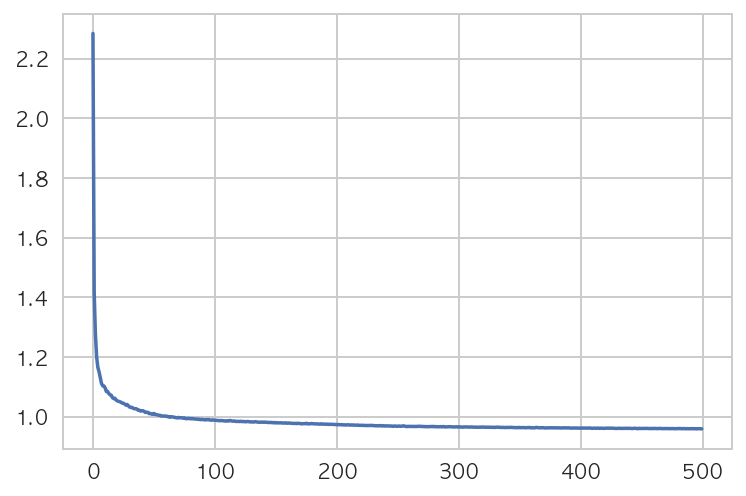

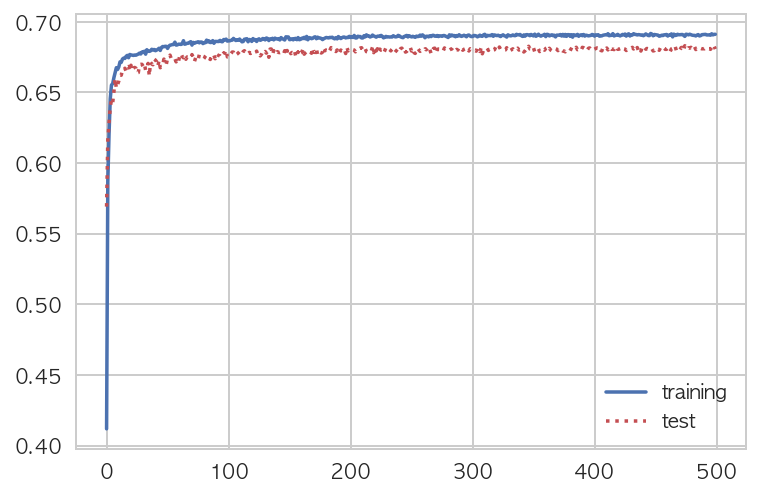

In [96]:
getNeuralNetworkInfo(hist3)

In [ ]:
triptype_li = [4, 8, 9, 12, 14, 22, 29, 41, 42]

In [108]:
from keras.layers import Dropout

In [113]:
model5 = Sequential()
model5.add(Dense(55, input_dim=77, activation="relu", kernel_initializer="glorot_uniform"))
model5.add(Dropout(0.1))
# model4.add(Dense(20, activation="relu"))
model5.add(Dense(38, activation="softmax"))
model5.compile(optimizer=Adagrad(lr=1.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [114]:
%%time
hist4 = model5.fit(X_train, Y_train, epochs=500, batch_size=2000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 11.4195 - acc: 0.2470 - val_loss: 10.6356 - val_acc: 0.3159
Epoch 2/500
 - 0s - loss: 6.4074 - acc: 0.3418 - val_loss: 2.6294 - val_acc: 0.3763
Epoch 3/500
 - 0s - loss: 2.4796 - acc: 0.3790 - val_loss: 2.3189 - val_acc: 0.3915
Epoch 4/500
 - 0s - loss: 2.2486 - acc: 0.4228 - val_loss: 2.1198 - val_acc: 0.4341
Epoch 5/500
 - 0s - loss: 2.1017 - acc: 0.4521 - val_loss: 1.9952 - val_acc: 0.4691
Epoch 6/500
 - 0s - loss: 1.9702 - acc: 0.4733 - val_loss: 1.8871 - val_acc: 0.4827
Epoch 7/500
 - 0s - loss: 1.8871 - acc: 0.4845 - val_loss: 1.8096 - val_acc: 0.5022
Epoch 8/500
 - 0s - loss: 1.7993 - acc: 0.5007 - val_loss: 1.7123 - val_acc: 0.5323
Epoch 9/500
 - 0s - loss: 1.7465 - acc: 0.5074 - val_loss: 1.6910 - val_acc: 0.5225
Epoch 10/500
 - 0s - loss: 1.6781 - acc: 0.5191 - val_loss: 1.7079 - val_acc: 0.4975
Epoch 11/500
 - 0s - loss: 1.6568 - acc: 0.5196 - val_loss: 1.6571 - val_acc: 0.5440
Epoch 12/500
 - 0s - l

Epoch 97/500
 - 0s - loss: 1.1116 - acc: 0.6504 - val_loss: 1.1373 - val_acc: 0.6505
Epoch 98/500
 - 0s - loss: 1.1139 - acc: 0.6506 - val_loss: 1.1096 - val_acc: 0.6659
Epoch 99/500
 - 0s - loss: 1.1095 - acc: 0.6476 - val_loss: 1.1119 - val_acc: 0.6588
Epoch 100/500
 - 0s - loss: 1.1104 - acc: 0.6494 - val_loss: 1.1152 - val_acc: 0.6604
Epoch 101/500
 - 0s - loss: 1.1030 - acc: 0.6529 - val_loss: 1.1119 - val_acc: 0.6618
Epoch 102/500
 - 0s - loss: 1.1055 - acc: 0.6516 - val_loss: 1.1181 - val_acc: 0.6581
Epoch 103/500
 - 0s - loss: 1.1047 - acc: 0.6503 - val_loss: 1.1166 - val_acc: 0.6612
Epoch 104/500
 - 0s - loss: 1.1047 - acc: 0.6499 - val_loss: 1.1102 - val_acc: 0.6611
Epoch 105/500
 - 0s - loss: 1.1054 - acc: 0.6484 - val_loss: 1.1092 - val_acc: 0.6623
Epoch 106/500
 - 0s - loss: 1.1017 - acc: 0.6505 - val_loss: 1.1047 - val_acc: 0.6621
Epoch 107/500
 - 0s - loss: 1.1043 - acc: 0.6497 - val_loss: 1.1061 - val_acc: 0.6620
Epoch 108/500
 - 0s - loss: 1.1003 - acc: 0.6519 - val_lo

Epoch 193/500
 - 0s - loss: 1.0429 - acc: 0.6646 - val_loss: 1.0682 - val_acc: 0.6690
Epoch 194/500
 - 0s - loss: 1.0415 - acc: 0.6624 - val_loss: 1.0684 - val_acc: 0.6654
Epoch 195/500
 - 0s - loss: 1.0418 - acc: 0.6629 - val_loss: 1.0643 - val_acc: 0.6717
Epoch 196/500
 - 0s - loss: 1.0428 - acc: 0.6633 - val_loss: 1.0653 - val_acc: 0.6701
Epoch 197/500
 - 0s - loss: 1.0428 - acc: 0.6628 - val_loss: 1.0768 - val_acc: 0.6656
Epoch 198/500
 - 0s - loss: 1.0412 - acc: 0.6638 - val_loss: 1.0754 - val_acc: 0.6711
Epoch 199/500
 - 0s - loss: 1.0440 - acc: 0.6628 - val_loss: 1.0706 - val_acc: 0.6701
Epoch 200/500
 - 0s - loss: 1.0452 - acc: 0.6606 - val_loss: 1.0741 - val_acc: 0.6605
Epoch 201/500
 - 0s - loss: 1.0389 - acc: 0.6646 - val_loss: 1.0642 - val_acc: 0.6726
Epoch 202/500
 - 0s - loss: 1.0411 - acc: 0.6642 - val_loss: 1.0833 - val_acc: 0.6658
Epoch 203/500
 - 0s - loss: 1.0425 - acc: 0.6638 - val_loss: 1.0720 - val_acc: 0.6698
Epoch 204/500
 - 0s - loss: 1.0385 - acc: 0.6643 - val

Epoch 289/500
 - 0s - loss: 1.0202 - acc: 0.6672 - val_loss: 1.0566 - val_acc: 0.6729
Epoch 290/500
 - 0s - loss: 1.0211 - acc: 0.6678 - val_loss: 1.0654 - val_acc: 0.6701
Epoch 291/500
 - 0s - loss: 1.0194 - acc: 0.6674 - val_loss: 1.0634 - val_acc: 0.6725
Epoch 292/500
 - 0s - loss: 1.0223 - acc: 0.6665 - val_loss: 1.0663 - val_acc: 0.6698
Epoch 293/500
 - 0s - loss: 1.0172 - acc: 0.6687 - val_loss: 1.0599 - val_acc: 0.6708
Epoch 294/500
 - 0s - loss: 1.0191 - acc: 0.6678 - val_loss: 1.0664 - val_acc: 0.6749
Epoch 295/500
 - 0s - loss: 1.0211 - acc: 0.6681 - val_loss: 1.0555 - val_acc: 0.6747
Epoch 296/500
 - 0s - loss: 1.0220 - acc: 0.6662 - val_loss: 1.0609 - val_acc: 0.6727
Epoch 297/500
 - 0s - loss: 1.0184 - acc: 0.6681 - val_loss: 1.0558 - val_acc: 0.6767
Epoch 298/500
 - 0s - loss: 1.0151 - acc: 0.6696 - val_loss: 1.0639 - val_acc: 0.6739
Epoch 299/500
 - 0s - loss: 1.0169 - acc: 0.6669 - val_loss: 1.0573 - val_acc: 0.6756
Epoch 300/500
 - 0s - loss: 1.0200 - acc: 0.6677 - val

Epoch 385/500
 - 0s - loss: 1.0087 - acc: 0.6701 - val_loss: 1.0628 - val_acc: 0.6765
Epoch 386/500
 - 0s - loss: 1.0117 - acc: 0.6690 - val_loss: 1.0598 - val_acc: 0.6756
Epoch 387/500
 - 0s - loss: 1.0078 - acc: 0.6696 - val_loss: 1.0617 - val_acc: 0.6726
Epoch 388/500
 - 0s - loss: 1.0085 - acc: 0.6700 - val_loss: 1.0586 - val_acc: 0.6770
Epoch 389/500
 - 0s - loss: 1.0047 - acc: 0.6703 - val_loss: 1.0662 - val_acc: 0.6709
Epoch 390/500
 - 0s - loss: 1.0086 - acc: 0.6686 - val_loss: 1.0583 - val_acc: 0.6784
Epoch 391/500
 - 0s - loss: 1.0057 - acc: 0.6702 - val_loss: 1.0661 - val_acc: 0.6745
Epoch 392/500
 - 0s - loss: 1.0076 - acc: 0.6691 - val_loss: 1.0616 - val_acc: 0.6729
Epoch 393/500
 - 0s - loss: 1.0069 - acc: 0.6688 - val_loss: 1.0589 - val_acc: 0.6778
Epoch 394/500
 - 0s - loss: 1.0059 - acc: 0.6691 - val_loss: 1.0641 - val_acc: 0.6724
Epoch 395/500
 - 0s - loss: 1.0064 - acc: 0.6705 - val_loss: 1.0623 - val_acc: 0.6754
Epoch 396/500
 - 0s - loss: 1.0070 - acc: 0.6707 - val

Epoch 481/500
 - 0s - loss: 0.9993 - acc: 0.6717 - val_loss: 1.0663 - val_acc: 0.6766
Epoch 482/500
 - 0s - loss: 0.9998 - acc: 0.6708 - val_loss: 1.0602 - val_acc: 0.6781
Epoch 483/500
 - 0s - loss: 0.9987 - acc: 0.6711 - val_loss: 1.0655 - val_acc: 0.6779
Epoch 484/500
 - 0s - loss: 1.0017 - acc: 0.6709 - val_loss: 1.0646 - val_acc: 0.6778
Epoch 485/500
 - 0s - loss: 1.0000 - acc: 0.6707 - val_loss: 1.0632 - val_acc: 0.6776
Epoch 486/500
 - 0s - loss: 0.9968 - acc: 0.6735 - val_loss: 1.0652 - val_acc: 0.6738
Epoch 487/500
 - 0s - loss: 0.9995 - acc: 0.6712 - val_loss: 1.0648 - val_acc: 0.6773
Epoch 488/500
 - 0s - loss: 0.9953 - acc: 0.6742 - val_loss: 1.0658 - val_acc: 0.6747
Epoch 489/500
 - 0s - loss: 0.9995 - acc: 0.6733 - val_loss: 1.0615 - val_acc: 0.6792
Epoch 490/500
 - 0s - loss: 1.0015 - acc: 0.6708 - val_loss: 1.0714 - val_acc: 0.6707
Epoch 491/500
 - 0s - loss: 0.9990 - acc: 0.6721 - val_loss: 1.0644 - val_acc: 0.6733
Epoch 492/500
 - 0s - loss: 0.9981 - acc: 0.6718 - val

In [99]:
proba_new = model5.predict(X_train)

In [100]:
log_loss(Y_train, proba_new)

0.7712728598556832